# Activation Functions

Because they are so fundamental to deep learning, before going further, let’s take a brief look at some
common activation functions.

In [1]:
import torch
import matplotlib.pyplot as plt

## ReLU Function

The most popular choice, due to its simplicity of implementation and its efficacy in training
is the rectified linear unit (ReLU). ReLUs provide a very simple nonlinear transformation. Given the element
$x$, the function is defined as the maximum of that element and 0. $$ReLU(x) = \max(x, 0)$$

To get a better idea of what it looks like, we can plot it.

In [2]:
# create x from -8 to 8 with 0.1 steps and make requires_grad True
x = torch.arange(-8.0, 8.0, 0.1)
x.requires_grad = True

Because it is used so commonly, PyTorch tensor supports the relu function as a basic native operator. As you can
see, the activation function is piece-wise linear.

In [3]:
# use pytorch's relu on x to define y
y = x.relu()

Text(0, 0.5, 'relu(x)')

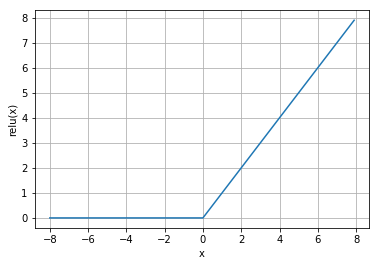

In [4]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.grid(True)
plt.xlabel('x')
plt.ylabel('relu(x)')

When the input is negative, the derivative of ReLU function is 0 and when the input is positive, the derivative
of ReLU function is 1. Note that the ReLU function is not differentiable when the input takes value precisely
equal to 0. In these cases, we go with the left-hand-side (LHS) derivative and say that the derivative is 0
when the input is 0. We can get away with this because the input may never actually be zero. There’s an old
adage that if subtle boundary conditions matter, we are probably doing (real) mathematics, not engineering.
That conventional wisdom may apply here. See the derivative of the ReLU function plotted below.

Text(0, 0.5, 'grad of relu')

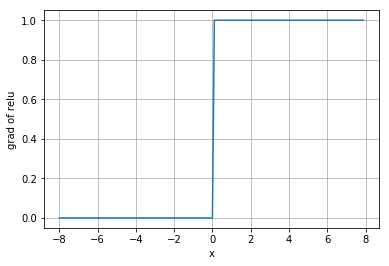

In [5]:
y.backward(torch.ones_like(x))
# why do we need an input to backward function https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95

plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.grid(True)
plt.xlabel('x')
plt.ylabel('grad of relu')

The reason for using the ReLU is that its derivatives are particularly well behaved - either they vanish or
they just let the argument through. This makes optimization better behaved and it reduces the issue of the
vanishing gradient problem (more on this later).

## Sigmoid Function

The sigmoid function transforms its inputs which take values in $\mathbb{R}$ to the interval (0, 1). For that reason, the
sigmoid is often called a *squashing* function: it squashes any input in the range (-inf, inf) to some value in
the range (0,1). $$\mbox{sigmoid}(x) = \frac{1}{1 + \exp (-x)}$$

When attention shifted to gradient based learning, the sigmoid function was a natural choice because it
is a smooth, differentiable approximation to a thresholding unit. Sigmoids are still common as activation
functions on the output units, when we want to interpret the outputs as probabilities for binary classification
problems (you can think of the sigmoid as a special case of the softmax) but the sigmoid has mostly been
replaced by the simpler and easier to train ReLU for most use in hidden layers.

See the sigmoid function plotted below. When the input is close to 0, the sigmoid function approaches a
linear transformation.

Text(0, 0.5, 'sigmoid(x)')

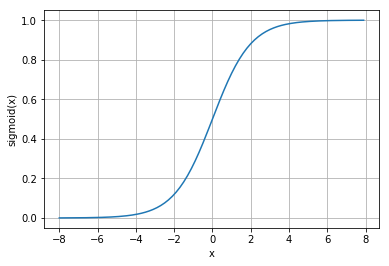

In [6]:
# insert your code here
x = torch.arange(-8.0, 8.0, 0.1)
x.requires_grad = True
y = x.sigmoid()

plt.plot(x.detach().numpy(), y.detach().numpy())
plt.grid(True)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

Let's compute the derivative of sigmoid function:

$$\frac{d}{dx}\mbox{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \mbox{sigmoid}(x)(1 - \mbox{sigmoid}(x))$$

The derivative of sigmoid function is plotted below. Note that when the input is 0, the derivative of the
sigmoid function reaches a maximum of 0.25. As the input diverges from 0 in either direction, the derivative
approaches 0.

Text(0, 0.5, 'grad of sigmoid')

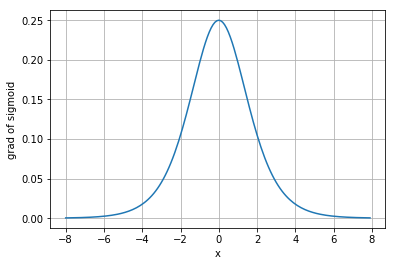

In [8]:
# insert your code here
# why do we need an input to backward function https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95
y.backward(torch.ones_like(x))

plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.grid(True)
plt.xlabel('x')
plt.ylabel('grad of sigmoid')

## Tanh Function

Like the sigmoid function, the tanh (Hyperbolic Tangent) function also squashes its inputs, transforms them
into elements on the interval between -1 and 1:
$$tanh(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)} $$.

We plot the tanh function blow. Note that as the input nears 0, the tanh function approaches a linear
transformation. Although the shape of the function is similar to the sigmoid function, the tanh function
exhibits point symmetry about the origin of the coordinate system.

In [ ]:
# insert your code here


plt.plot(x.detach().numpy(), y.detach().numpy())
plt.grid(True)
plt.xlabel('x')
plt.ylabel('tanh(x)')

The derivative of the Tanh function is: $$\frac{d}{dx} tanh(x) = 1 - tanh^2(x)$$

The derivative of tanh function is plotted below. As the input nears 0, the derivative of the tanh function
approaches a maximum of 1. And as we saw with the sigmoid function, as the input moves away from 0 in
either direction, the derivative of the tanh function approaches 0.

In [ ]:
# insert your code here
# why do we need an input to backward function https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95

plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.grid(True)
plt.xlabel('x')
plt.ylabel('grad of tanh')

In summary, we now know how to incorporate nonlinearities to build expressive multilayer neural network
architectures. As a side note, your knowledge now already puts you in command of the state of the art in
deep learning, circa 1990. In fact, you have an advantage over anyone working the 1990s, because you can
leverage powerful open-source deep learning frameworks to build models rapidly, using only a few lines of code. Previously, getting these nets training required researchers to code up thousands of lines of C and
Fortran.